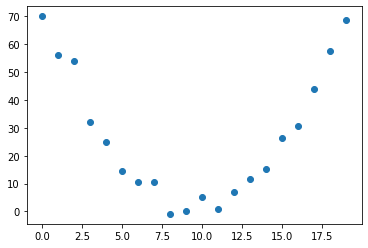

In [1]:
from fastai.vision.all import *

# Create a sample dataset of speeds at different times
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

**Problem**
Find a quadratic function f(x) = A*x^2 = B*x + C to describe data
  - A, B, C are the parameters / weights

In [2]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [3]:
# Define a loss function
def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()

**Steps**
#### 1) Initialize Parameters

In [23]:
params = torch.randn(3).requires_grad_()
print(params)

tensor([ 0.0581, -0.6530,  0.2233], requires_grad=True)


#### 2) Calculate Predictions

In [24]:
preds = f(time, params)

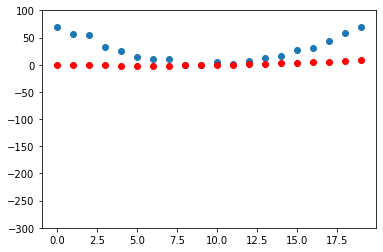

In [25]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

#### 3) Calculate Loss

In [7]:
loss = mse(preds, speed)
loss

tensor(28.0849, grad_fn=<SqrtBackward>)

#### 4) Calculate Gradient

In [8]:
loss.backward()
params.grad

tensor([49.4627,  2.9059, -0.1847])

#### 5) Step the weights

In [9]:
# Define learning rate
lr = 1e-5
# *.data sets data attribute w/o computing the gradient
params.data -= lr * params.grad.data
params.grad = None


#### Check results

tensor(28.0605, grad_fn=<SqrtBackward>)


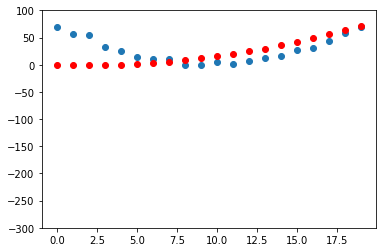

In [10]:
preds = f(time,params)
print(mse(preds, speed))
show_preds(preds)

#### 6) Repeat steps 2-5

In [11]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [26]:
for i in range(10):
    apply_step(params)

33.538818359375
33.43279266357422
33.3278923034668
33.22410202026367
33.121437072753906
33.01987838745117
32.91943359375
32.820098876953125
32.72187805175781
32.624755859375


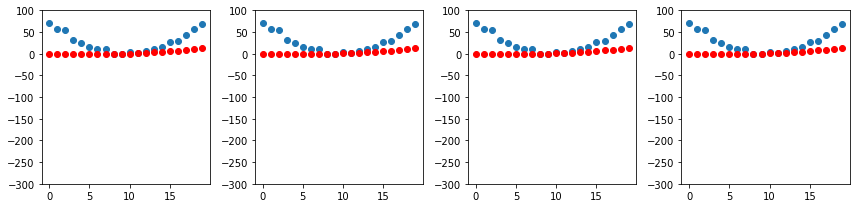

In [27]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs:
    show_preds(apply_step(params, False), ax)
plt.tight_layout()